In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df.reset_index()
df.head()

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]
    """
def dataframe_to_xy(df, sequence_size):

    out_X = np.zeros((len(df)//sequence_size, sequence_size, 8))
    out_y = np.zeros((len(df)//sequence_size, sequence_size))
    i = 0
    while i + sequence_size < len(df):
        sequence = df.iloc[i:i+sequence_size]
        out_X[i//sequence_size] =  np.array(sequence[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                                 'tgrad', 'pressure', 'pluvio']])
        out_y[i//sequence_size] = np.array(sequence['NO2_ref'])
        i += sequence_size
        
    return out_X, out_y
    """

def dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]),\
            np.array(df['NO2_ref']))

        
df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid= X_valid.reshape((X_valid.shape[0], 1,  X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

#y_train = y_train.reshape((1, len(y_train)))
#y_valid = y_valid.reshape((1, len(y_valid)))
#y_test = y_test.reshape((1, len(y_test)))

def dataframe_to_xy_sequences(df, sequence_size):
    out_X = np.zeros((len(df)//sequence_size, sequence_size, 8))
    out_y = np.zeros((len(df)//sequence_size, sequence_size))
    i = 0
    while i + sequence_size < len(df):
        sequence = df.iloc[i:i+sequence_size]
        out_X[i//sequence_size] =  np.array(sequence[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                                 'tgrad', 'pressure', 'pluvio']])
        out_y[i//sequence_size] = np.array(sequence['NO2_ref'])
        i += sequence_size
        
    return out_X, out_y

In [3]:
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def simple_rnn_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adam'):
    print(input_dim)
    model = Sequential()
    model.add(SimpleRNN(nb_units, input_shape=input_dim))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    #model.add(Dense(nb_units))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


In [4]:
model = simple_rnn_model(16, X_train.shape[1:])

(1, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [5]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1, shuffle=False)

Train on 1126 samples, validate on 563 samples
Epoch 1/10000
1126/1126 [==============================] - 0s - loss: 3352.5525 - val_loss: 3015.8167
Epoch 2/10000
1126/1126 [==============================] - 0s - loss: 3342.8907 - val_loss: 3007.8665
Epoch 3/10000
1126/1126 [==============================] - 0s - loss: 3331.3117 - val_loss: 2998.1805
Epoch 4/10000
1126/1126 [==============================] - 0s - loss: 3316.6519 - val_loss: 2986.1466
Epoch 5/10000
1126/1126 [==============================] - 0s - loss: 3298.6062 - val_loss: 2971.3558
Epoch 6/10000
1126/1126 [==============================] - 0s - loss: 3277.0715 - val_loss: 2953.5259
Epoch 7/10000
1126/1126 [==============================] - 0s - loss: 3251.8953 - val_loss: 2932.4591
Epoch 8/10000
1126/1126 [==============================] - 0s - loss: 3222.9662 - val_loss: 2907.9869
Epoch 9/10000
1126/1126 [==============================] - 0s - loss: 3190.3740 - val_loss: 2880.1756
Epoch 10/10000
1126/1126 [=========

1126/1126 [==============================] - 0s - loss: 1269.2637 - val_loss: 1102.9789
Epoch 81/10000
1126/1126 [==============================] - 0s - loss: 1256.2512 - val_loss: 1092.5091
Epoch 82/10000
1126/1126 [==============================] - 0s - loss: 1243.4040 - val_loss: 1082.2287
Epoch 83/10000
1126/1126 [==============================] - 0s - loss: 1230.7200 - val_loss: 1072.1304
Epoch 84/10000
1126/1126 [==============================] - 0s - loss: 1218.1967 - val_loss: 1062.2074
Epoch 85/10000
1126/1126 [==============================] - 0s - loss: 1205.8309 - val_loss: 1052.4530
Epoch 86/10000
1126/1126 [==============================] - 0s - loss: 1193.6185 - val_loss: 1042.8603
Epoch 87/10000
1126/1126 [==============================] - 0s - loss: 1181.5554 - val_loss: 1033.4218
Epoch 88/10000
1126/1126 [==============================] - 0s - loss: 1169.6370 - val_loss: 1024.1309
Epoch 89/10000
1126/1126 [==============================] - 0s - loss: 1157.8586 - val_l

1126/1126 [==============================] - 0s - loss: 533.0903 - val_loss: 484.6076
Epoch 161/10000
1126/1126 [==============================] - 0s - loss: 527.1262 - val_loss: 479.4060
Epoch 162/10000
1126/1126 [==============================] - 0s - loss: 521.2456 - val_loss: 474.3009
Epoch 163/10000
1126/1126 [==============================] - 0s - loss: 515.4482 - val_loss: 469.2914
Epoch 164/10000
1126/1126 [==============================] - 0s - loss: 509.7335 - val_loss: 464.3766
Epoch 165/10000
1126/1126 [==============================] - 0s - loss: 504.1009 - val_loss: 459.5552
Epoch 166/10000
1126/1126 [==============================] - 0s - loss: 498.5500 - val_loss: 454.8266
Epoch 167/10000
1126/1126 [==============================] - 0s - loss: 493.0800 - val_loss: 450.1896
Epoch 168/10000
1126/1126 [==============================] - 0s - loss: 487.6906 - val_loss: 445.6429
Epoch 169/10000
1126/1126 [==============================] - 0s - loss: 482.3811 - val_loss: 441.1

1126/1126 [==============================] - 0s - loss: 260.0683 - val_loss: 271.7236
Epoch 241/10000
1126/1126 [==============================] - 0s - loss: 258.3060 - val_loss: 270.3046
Epoch 242/10000
1126/1126 [==============================] - 0s - loss: 256.5614 - val_loss: 268.8939
Epoch 243/10000
1126/1126 [==============================] - 0s - loss: 254.8342 - val_loss: 267.4916
Epoch 244/10000
1126/1126 [==============================] - 0s - loss: 253.1240 - val_loss: 266.0981
Epoch 245/10000
1126/1126 [==============================] - 0s - loss: 251.4307 - val_loss: 264.7134
Epoch 246/10000
1126/1126 [==============================] - 0s - loss: 249.7537 - val_loss: 263.3381
Epoch 247/10000
1126/1126 [==============================] - 0s - loss: 248.0930 - val_loss: 261.9722
Epoch 248/10000
1126/1126 [==============================] - 0s - loss: 246.4483 - val_loss: 260.6163
Epoch 249/10000
1126/1126 [==============================] - 0s - loss: 244.8194 - val_loss: 259.2

1126/1126 [==============================] - 0s - loss: 167.7418 - val_loss: 200.5895
Epoch 321/10000
1126/1126 [==============================] - 0s - loss: 167.1263 - val_loss: 200.1374
Epoch 322/10000
1126/1126 [==============================] - 0s - loss: 166.5171 - val_loss: 199.6875
Epoch 323/10000
1126/1126 [==============================] - 0s - loss: 165.9139 - val_loss: 199.2392
Epoch 324/10000
1126/1126 [==============================] - 0s - loss: 165.3164 - val_loss: 198.7921
Epoch 325/10000
1126/1126 [==============================] - 0s - loss: 164.7242 - val_loss: 198.3460
Epoch 326/10000
1126/1126 [==============================] - 0s - loss: 164.1369 - val_loss: 197.9003
Epoch 327/10000
1126/1126 [==============================] - 0s - loss: 163.5544 - val_loss: 197.4549
Epoch 328/10000
1126/1126 [==============================] - 0s - loss: 162.9761 - val_loss: 197.0093
Epoch 329/10000
1126/1126 [==============================] - 0s - loss: 162.4019 - val_loss: 196.5

1126/1126 [==============================] - 0s - loss: 124.1901 - val_loss: 166.0704
Epoch 401/10000
1126/1126 [==============================] - 0s - loss: 123.7323 - val_loss: 165.6809
Epoch 402/10000
1126/1126 [==============================] - 0s - loss: 123.2776 - val_loss: 165.2923
Epoch 403/10000
1126/1126 [==============================] - 0s - loss: 122.8261 - val_loss: 164.9045
Epoch 404/10000
1126/1126 [==============================] - 0s - loss: 122.3777 - val_loss: 164.5177
Epoch 405/10000
1126/1126 [==============================] - 0s - loss: 121.9323 - val_loss: 164.1318
Epoch 406/10000
1126/1126 [==============================] - 0s - loss: 121.4900 - val_loss: 163.7469
Epoch 407/10000
1126/1126 [==============================] - 0s - loss: 121.0507 - val_loss: 163.3631
Epoch 408/10000
1126/1126 [==============================] - 0s - loss: 120.6143 - val_loss: 162.9803
Epoch 409/10000
1126/1126 [==============================] - 0s - loss: 120.1806 - val_loss: 162.5

1126/1126 [==============================] - 0s - loss: 93.4618 - val_loss: 138.2137
Epoch 481/10000
1126/1126 [==============================] - 0s - loss: 93.1495 - val_loss: 137.9181
Epoch 482/10000
1126/1126 [==============================] - 0s - loss: 92.8389 - val_loss: 137.6238
Epoch 483/10000
1126/1126 [==============================] - 0s - loss: 92.5301 - val_loss: 137.3308
Epoch 484/10000
1126/1126 [==============================] - 0s - loss: 92.2230 - val_loss: 137.0392
Epoch 485/10000
1126/1126 [==============================] - 0s - loss: 91.9178 - val_loss: 136.7491
Epoch 486/10000
1126/1126 [==============================] - 0s - loss: 91.6142 - val_loss: 136.4603
Epoch 487/10000
1126/1126 [==============================] - 0s - loss: 91.3123 - val_loss: 136.1730
Epoch 488/10000
1126/1126 [==============================] - 0s - loss: 91.0121 - val_loss: 135.8871
Epoch 489/10000
1126/1126 [==============================] - 0s - loss: 90.7135 - val_loss: 135.6027
Epoch 

1126/1126 [==============================] - 0s - loss: 73.3815 - val_loss: 117.9372
Epoch 562/10000
1126/1126 [==============================] - 0s - loss: 73.2001 - val_loss: 117.7048
Epoch 563/10000
1126/1126 [==============================] - 0s - loss: 73.0203 - val_loss: 117.4722
Epoch 564/10000
1126/1126 [==============================] - 0s - loss: 72.8419 - val_loss: 117.2395
Epoch 565/10000
1126/1126 [==============================] - 0s - loss: 72.6650 - val_loss: 117.0065
Epoch 566/10000
1126/1126 [==============================] - 0s - loss: 72.4896 - val_loss: 116.7735
Epoch 567/10000
1126/1126 [==============================] - 0s - loss: 72.3157 - val_loss: 116.5404
Epoch 568/10000
1126/1126 [==============================] - 0s - loss: 72.1432 - val_loss: 116.3070
Epoch 569/10000
1126/1126 [==============================] - 0s - loss: 71.9721 - val_loss: 116.0736
Epoch 570/10000
1126/1126 [==============================] - 0s - loss: 71.8024 - val_loss: 115.8400
Epoch 

1126/1126 [==============================] - 0s - loss: 62.8425 - val_loss: 100.5718
Epoch 643/10000
1126/1126 [==============================] - 0s - loss: 62.7567 - val_loss: 100.4042
Epoch 644/10000
1126/1126 [==============================] - 0s - loss: 62.6716 - val_loss: 100.2379
Epoch 645/10000
1126/1126 [==============================] - 0s - loss: 62.5874 - val_loss: 100.0730
Epoch 646/10000
1126/1126 [==============================] - 0s - loss: 62.5040 - val_loss: 99.9093
Epoch 647/10000
1126/1126 [==============================] - 0s - loss: 62.4214 - val_loss: 99.7470
Epoch 648/10000
1126/1126 [==============================] - 0s - loss: 62.3396 - val_loss: 99.5861
Epoch 649/10000
1126/1126 [==============================] - 0s - loss: 62.2586 - val_loss: 99.4265
Epoch 650/10000
1126/1126 [==============================] - 0s - loss: 62.1784 - val_loss: 99.2682
Epoch 651/10000
1126/1126 [==============================] - 0s - loss: 62.0989 - val_loss: 99.1112
Epoch 652/10

1126/1126 [==============================] - 0s - loss: 57.9038 - val_loss: 90.4929
Epoch 725/10000
1126/1126 [==============================] - 0s - loss: 57.8620 - val_loss: 90.4044
Epoch 726/10000
1126/1126 [==============================] - 0s - loss: 57.8204 - val_loss: 90.3164
Epoch 727/10000
1126/1126 [==============================] - 0s - loss: 57.7791 - val_loss: 90.2291
Epoch 728/10000
1126/1126 [==============================] - 0s - loss: 57.7380 - val_loss: 90.1423
Epoch 729/10000
1126/1126 [==============================] - 0s - loss: 57.6973 - val_loss: 90.0561
Epoch 730/10000
1126/1126 [==============================] - 0s - loss: 57.6567 - val_loss: 89.9705
Epoch 731/10000
1126/1126 [==============================] - 0s - loss: 57.6164 - val_loss: 89.8854
Epoch 732/10000
1126/1126 [==============================] - 0s - loss: 57.5764 - val_loss: 89.8009
Epoch 733/10000
1126/1126 [==============================] - 0s - loss: 57.5365 - val_loss: 89.7170
Epoch 734/10000


1126/1126 [==============================] - 0s - loss: 55.0235 - val_loss: 84.8372
Epoch 807/10000
1126/1126 [==============================] - 0s - loss: 54.9918 - val_loss: 84.7858
Epoch 808/10000
1126/1126 [==============================] - 0s - loss: 54.9601 - val_loss: 84.7348
Epoch 809/10000
1126/1126 [==============================] - 0s - loss: 54.9284 - val_loss: 84.6843
Epoch 810/10000
1126/1126 [==============================] - 0s - loss: 54.8968 - val_loss: 84.6341
Epoch 811/10000
1126/1126 [==============================] - 0s - loss: 54.8653 - val_loss: 84.5844
Epoch 812/10000
1126/1126 [==============================] - 0s - loss: 54.8338 - val_loss: 84.5352
Epoch 813/10000
1126/1126 [==============================] - 0s - loss: 54.8023 - val_loss: 84.4863
Epoch 814/10000
1126/1126 [==============================] - 0s - loss: 54.7710 - val_loss: 84.4380
Epoch 815/10000
1126/1126 [==============================] - 0s - loss: 54.7397 - val_loss: 84.3901
Epoch 816/10000


1126/1126 [==============================] - 0s - loss: 52.7332 - val_loss: 81.9660
Epoch 888/10000
1126/1126 [==============================] - 0s - loss: 52.7078 - val_loss: 81.9433
Epoch 889/10000
1126/1126 [==============================] - 0s - loss: 52.6825 - val_loss: 81.9208
Epoch 890/10000
1126/1126 [==============================] - 0s - loss: 52.6571 - val_loss: 81.8986
Epoch 891/10000
1126/1126 [==============================] - 0s - loss: 52.6319 - val_loss: 81.8766
Epoch 892/10000
1126/1126 [==============================] - 0s - loss: 52.6067 - val_loss: 81.8549
Epoch 893/10000
1126/1126 [==============================] - 0s - loss: 52.5815 - val_loss: 81.8334
Epoch 894/10000
1126/1126 [==============================] - 0s - loss: 52.5563 - val_loss: 81.8122
Epoch 895/10000
1126/1126 [==============================] - 0s - loss: 52.5312 - val_loss: 81.7911
Epoch 896/10000
1126/1126 [==============================] - 0s - loss: 52.5062 - val_loss: 81.7703
Epoch 897/10000


1126/1126 [==============================] - 0s - loss: 50.8138 - val_loss: 80.7966
Epoch 969/10000
1126/1126 [==============================] - 0s - loss: 50.7917 - val_loss: 80.7895
Epoch 970/10000
1126/1126 [==============================] - 0s - loss: 50.7698 - val_loss: 80.7825
Epoch 971/10000
1126/1126 [==============================] - 0s - loss: 50.7478 - val_loss: 80.7757
Epoch 972/10000
1126/1126 [==============================] - 0s - loss: 50.7259 - val_loss: 80.7690
Epoch 973/10000
1126/1126 [==============================] - 0s - loss: 50.7040 - val_loss: 80.7625
Epoch 974/10000
1126/1126 [==============================] - 0s - loss: 50.6822 - val_loss: 80.7561
Epoch 975/10000
1126/1126 [==============================] - 0s - loss: 50.6604 - val_loss: 80.7499
Epoch 976/10000
1126/1126 [==============================] - 0s - loss: 50.6386 - val_loss: 80.7439
Epoch 977/10000
1126/1126 [==============================] - 0s - loss: 50.6168 - val_loss: 80.7380
Epoch 978/10000


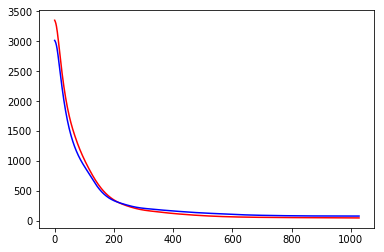

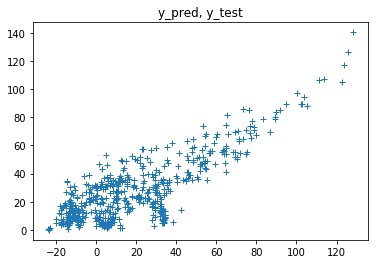

In [6]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()

In [7]:
X_train, y_train = dataframe_to_xy_sequences(df_train, 4)
X_valid, y_valid = dataframe_to_xy_sequences(df_valid, 4)
X_test, y_test = dataframe_to_xy_sequences(df_test, 4)

def simple_rnn_model(nb_units, input_dim, loss='mean_squared_error', optimizer='adagrad'):
    print(input_dim)
    model = Sequential()
    model.add(SimpleRNN(nb_units, batch_input_shape=(96, 4, 8)))#input_dim=input_dim[1], input_length=input_dim[0], return_sequences=True))
    #model.add(Dense(nb_units))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

In [8]:
model_2 = simple_rnn_model(16, X_train.shape[1:])

(4, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (96, 16)                  400       
_________________________________________________________________
dense_2 (Dense)              (96, 1)                   17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [9]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

ValueError: Error when checking input: expected simple_rnn_1_input to have shape (None, 1, 8) but got array with shape (281, 4, 8)

In [ ]:
X_train.shape